In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# للنصوص
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import arabic_reshaper
from bidi.algorithm import get_display

# للمعالجة المسبقة بالعربية
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer

# تجاهل التحذيرات
import warnings
warnings.filterwarnings("ignore")

In [4]:
!pip install arabic-reshaper python-bidi wordcloud

In [5]:
data = pd.read_csv('/content/Abjad_books.csv')

In [6]:
data.head()

,BookBadge_Title,Author,Rating,Description,Raters,Reviews,Readers,Link
0,ماجدولين,مصطفى لطفي المنفلوطي,4.4,لا نعرف عن الحُب غير وجهه الأليف الذي نُحِب، ل...,4057,4313,23055,https://www.abjjad.com/book/15445318/%D9%85%D8...
1,هكذا خُلقت,محمد حسين هيكل,4.2,روايةٌ واقعيةٌ تركَتْها بين يدَيِ المؤلف امرأة...,2701,2944,14769,https://www.abjjad.com/book/2019491840/%D9%87%...
2,قواعد العشق الأربعون,إليف شافاق,4.3,بلغت بطلة الرواية، إيلاّ الزوجة التعيسة، سنّ ا...,2643,2777,8242,https://www.abjjad.com/book/2138898432/%D9%82%...
3,في قلبي أنثى عبرية,خولة حمدي,4.5,في قلب حارة اليهود في الجنوب التونسي تتشابك ال...,3405,3518,10091,https://www.abjjad.com/book/2073100288/%D9%81%...
4,الأرواح المتمردة,جبران خليل جبران,4.3,«الأرواح المتمردة» هو كتاب صدر لأول مرة في مدي...,2478,2635,9857,https://www.abjjad.com/book/15445260/%D8%A7%D9...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BookBadge_Title  440 non-null    object 
 1   Author           440 non-null    object 
 2   Rating           440 non-null    float64
 3   Description      440 non-null    object 
 4   Raters           440 non-null    int64  
 5   Reviews          440 non-null    int64  
 6   Readers          440 non-null    int64  
 7   Link             440 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 27.6+ KB


In [8]:
data.describe(include='all')

,BookBadge_Title,Author,Rating,Description,Raters,Reviews,Readers,Link
count,440,440,440.000000,440,440.000000,440.000000,440.000000,440
unique,181,149,NaN,180,NaN,NaN,NaN,181
top,عبقرية عمر,عباس محمود العقاد,NaN,يزخر التاريخ الإسلامي برجال عِظام سطروا حوادثه...,NaN,NaN,NaN,https://www.abjjad.com/book/15445340/%D8%B9%D8...
freq,8,20,NaN,8,NaN,NaN,NaN,8
mean,NaN,NaN,4.272727,NaN,607.500000,629.813636,1961.427273,NaN
std,NaN,NaN,0.277611,NaN,1111.242205,1145.402635,3372.427116,NaN
min,NaN,NaN,3.200000,NaN,7.000000,7.000000,18.000000,NaN
25%,NaN,NaN,4.100000,NaN,44.750000,47.000000,214.500000,NaN
50%,NaN,NaN,4.300000,NaN,194.000000,206.000000,636.500000,NaN
75%,NaN,NaN,4.500000,NaN,550.500000,571.000000,2234.000000,NaN


In [10]:
data.isnull().sum()

,0
BookBadge_Title,0
Author,0
Rating,0
Description,0
Raters,0
Reviews,0
Readers,0
Link,0


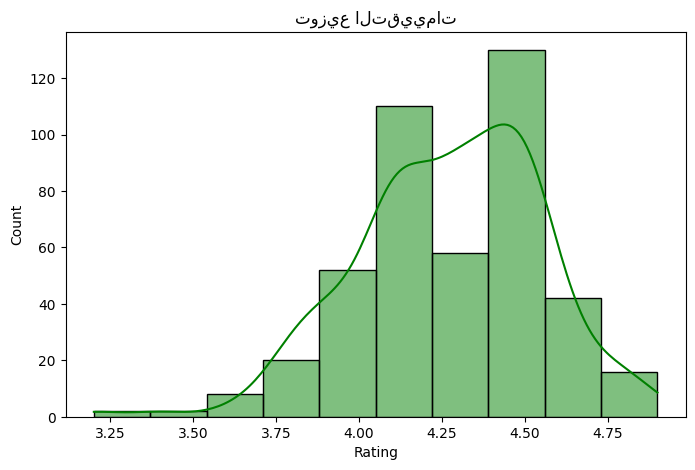

In [12]:
# تكرار التقييمات (Rating):
plt.figure(figsize=(8, 5))
sns.histplot(data['Rating'], bins=10, kde=True, color='green')
plt.title('توزيع التقييمات')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

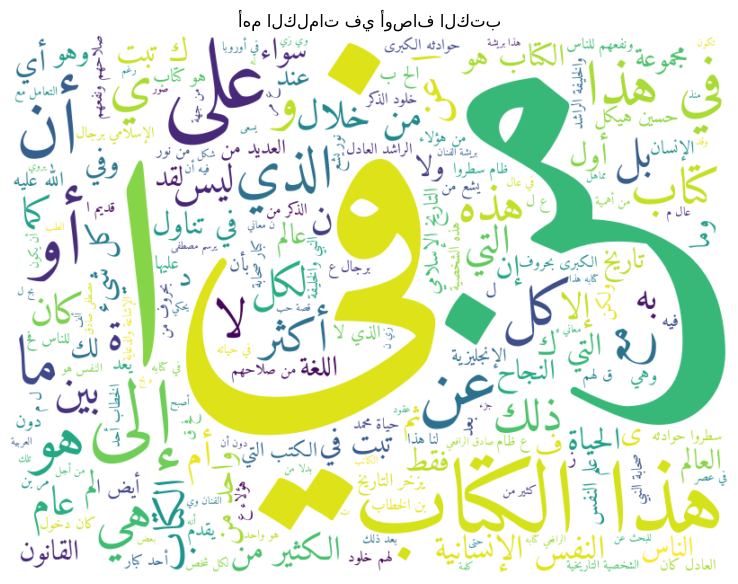

In [13]:
#عرض أهم الكلمات في عمود "الوصف" باستخدام WordCloud
from wordcloud import WordCloud

text = ' '.join(data['Description'].dropna().tolist())

# استخدام الخط العربي
wordcloud = WordCloud(
    font_path='/content/Amiri-Regular.ttf',
    background_color='white',
    width=800,
    height=600
).generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("أهم الكلمات في أوصاف الكتب")
plt.show()

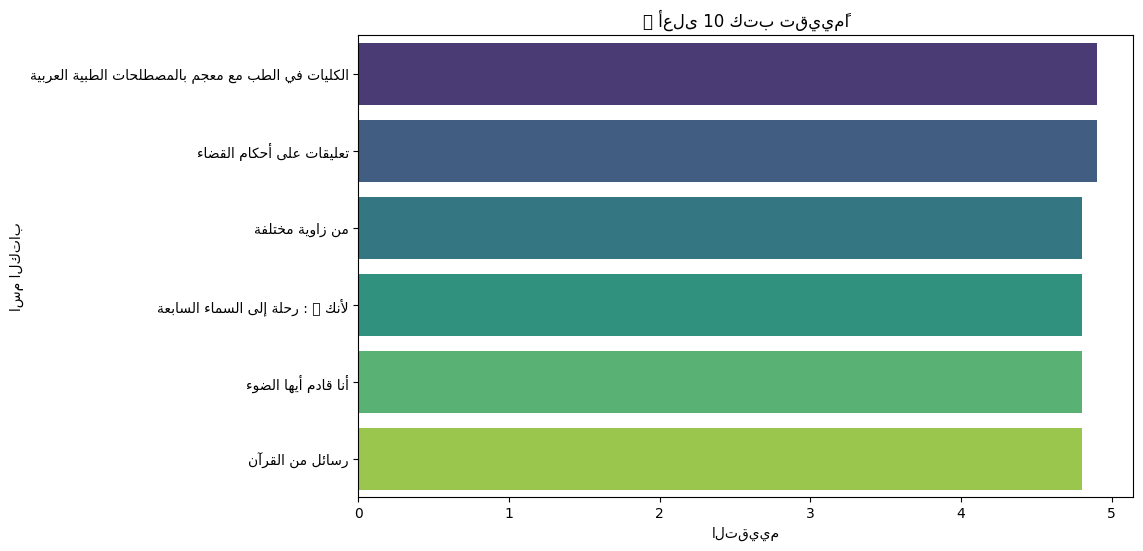

In [15]:
#أعلى الكتب تقييمًا:
top_books = data.sort_values(by="Rating", ascending=False).head(10)
plt.figure(figsize=(10, 6))
titles = [get_display(arabic_reshaper.reshape(t)) for t in top_books['BookBadge_Title']]
sns.barplot(y=titles, x=top_books["Rating"], palette="viridis")
plt.title("🔝 أعلى 10 كتب تقييمًا")
plt.xlabel("التقييم")
plt.ylabel("اسم الكتاب")
plt.show()

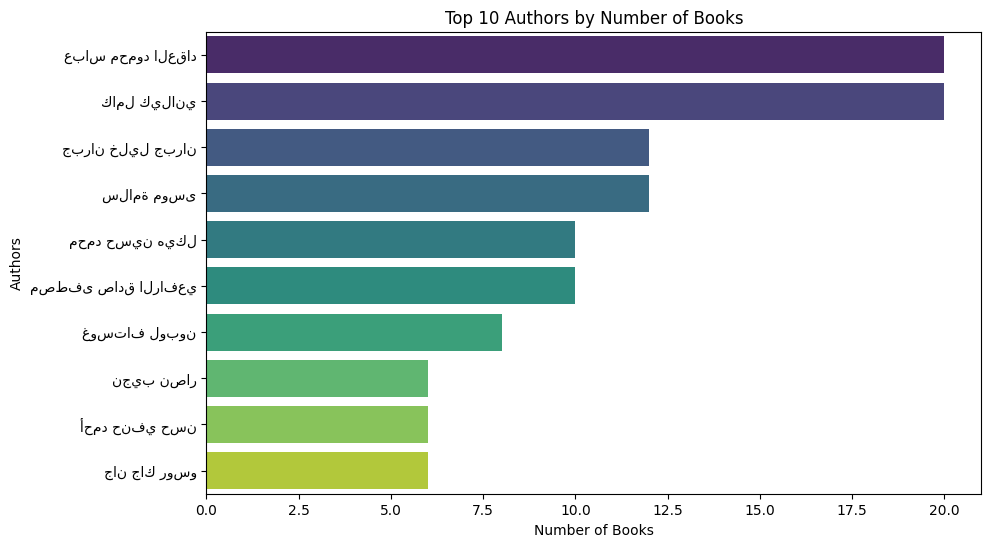

In [16]:
## Top authors by number of books
plt.figure(figsize=(10,6))
top_authors = data['Author'].value_counts().head(10)
sns.barplot(x=top_authors.values, y=top_authors.index, palette="viridis")
plt.title("Top 10 Authors by Number of Books")
plt.xlabel("Number of Books")
plt.ylabel("Authors")
plt.show()

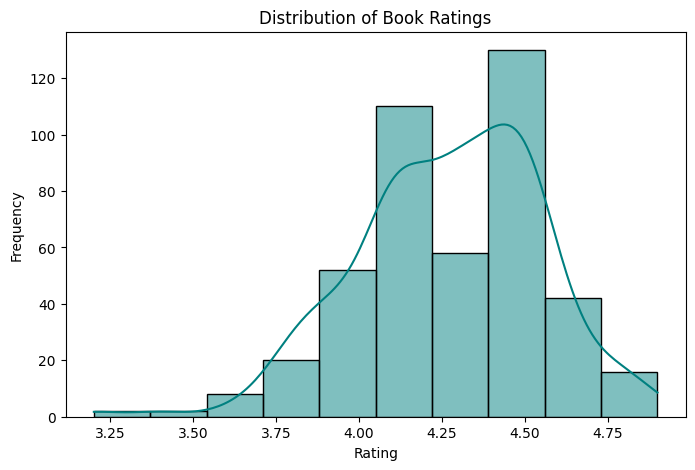

In [17]:
# Rating distribution
plt.figure(figsize=(8,5))
sns.histplot(data['Rating'], bins=10, kde=True, color='teal')
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

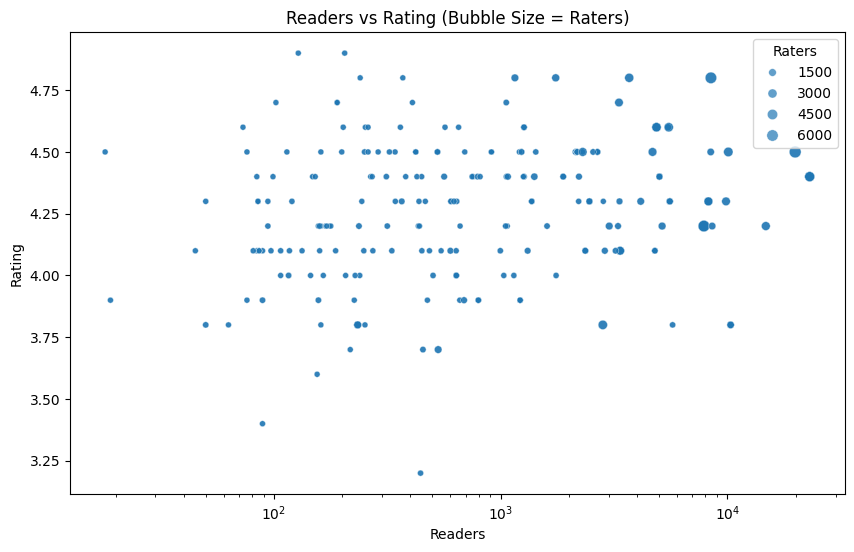

In [18]:
# Scatter plot: Readers vs Rating
plt.figure(figsize=(10,6))
sns.scatterplot(x='Readers', y='Rating', size='Raters', data=data, alpha=0.7)
plt.title("Readers vs Rating (Bubble Size = Raters)")
plt.xscale("log")
plt.show()

In [23]:
# إعادة تشكيل النص العربي لعرضه بشكل صحيح
data['Title_AR'] = data['BookBadge_Title'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

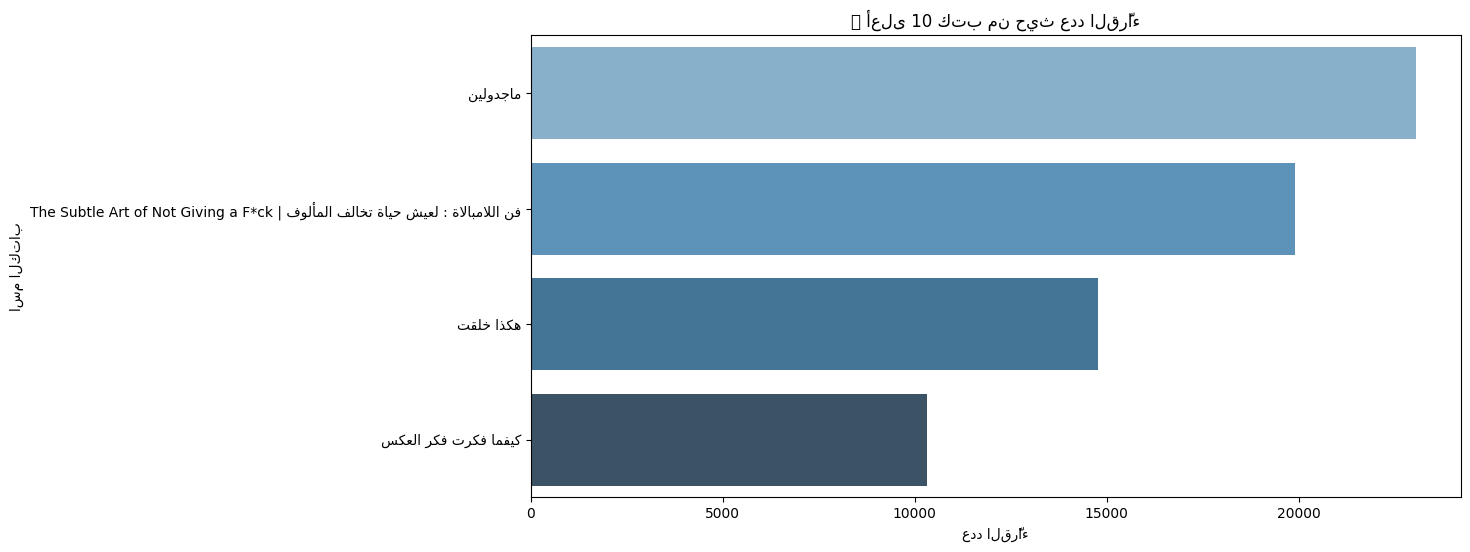

In [24]:
# أعلى 10 كتب من حيث عدد القرّاء (Readers)
top_readers = data.sort_values(by="Readers", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x="Readers", y="Title_AR", data=top_readers, palette="Blues_d")
plt.title("📚 أعلى 10 كتب من حيث عدد القرّاء")
plt.xlabel("عدد القرّاء")
plt.ylabel("اسم الكتاب")
plt.show()

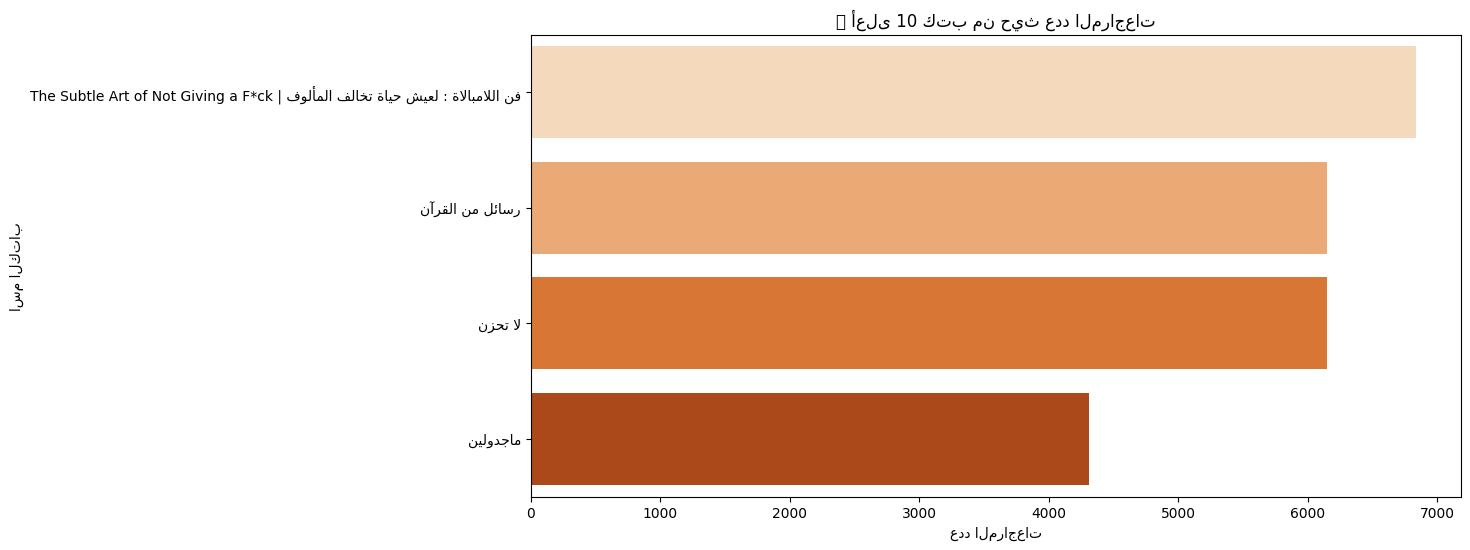

In [25]:
#أعلى 10 كتب من حيث عدد المراجعات (Reviews)
top_reviews = data.sort_values(by="Reviews", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x="Reviews", y="Title_AR", data=top_reviews, palette="Oranges")
plt.title("📝 أعلى 10 كتب من حيث عدد المراجعات")
plt.xlabel("عدد المراجعات")
plt.ylabel("اسم الكتاب")
plt.show()


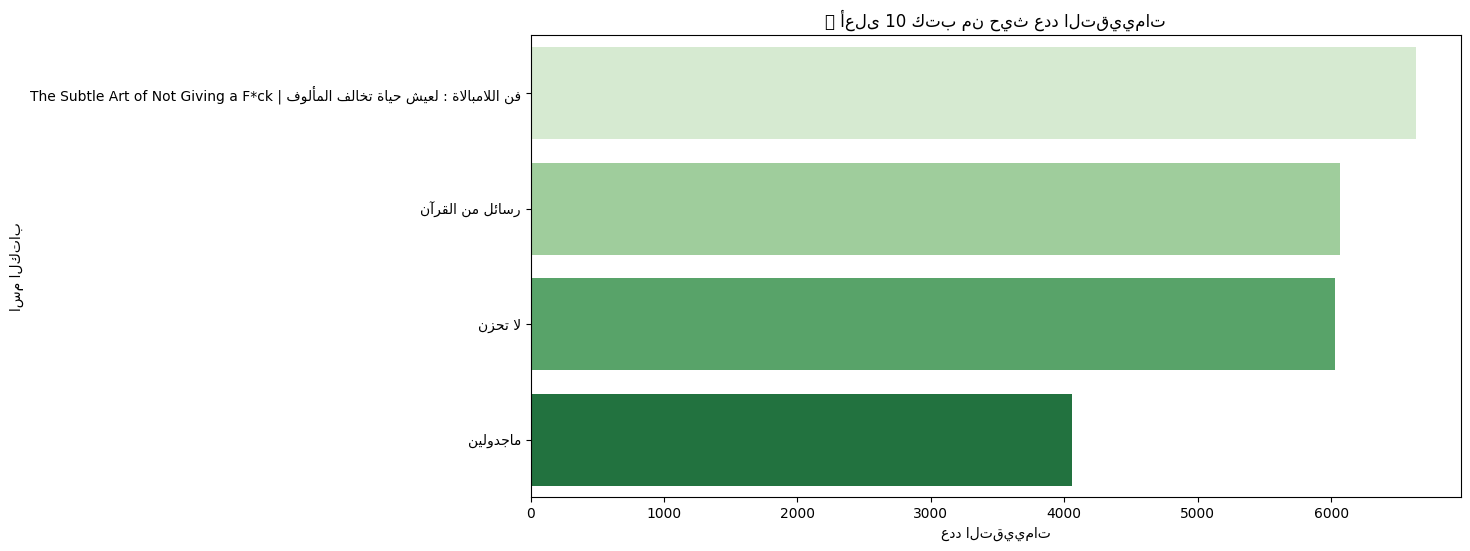

In [26]:
#أعلى 10 كتب من حيث عدد المقيمين (Raters)
top_raters = data.sort_values(by="Raters", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x="Raters", y="Title_AR", data=top_raters, palette="Greens")
plt.title("⭐ أعلى 10 كتب من حيث عدد التقييمات")
plt.xlabel("عدد التقييمات")
plt.ylabel("اسم الكتاب")
plt.show()

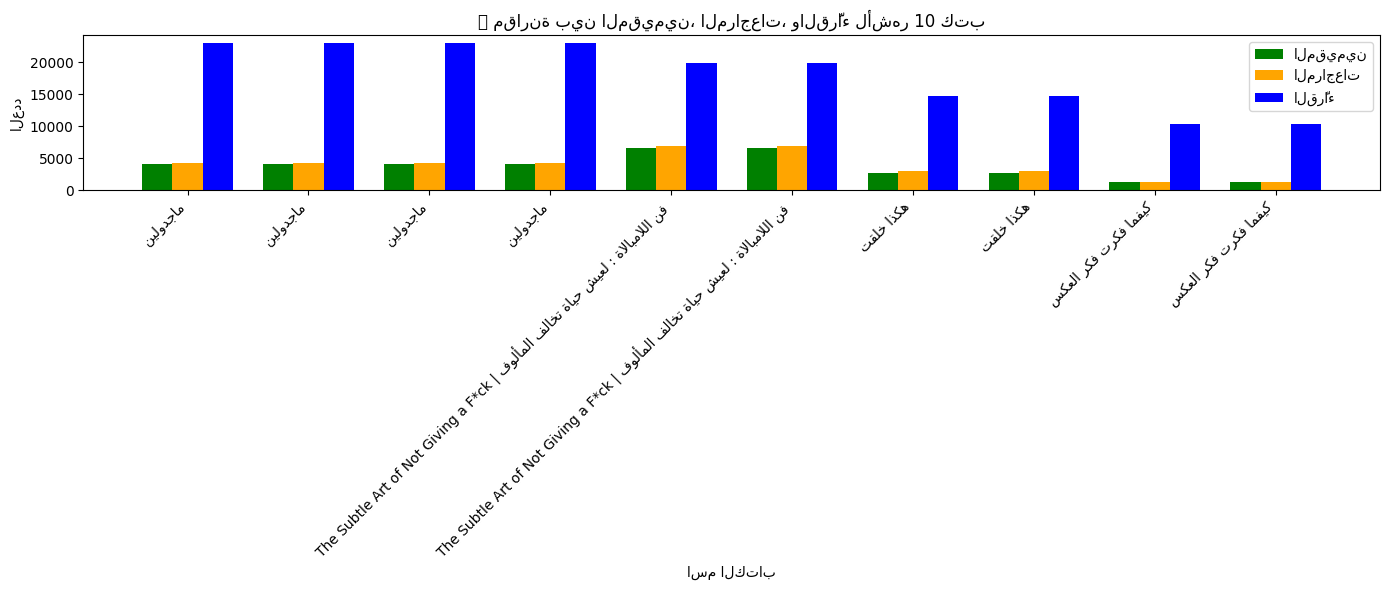

In [27]:
top_combined = data.sort_values(by="Readers", ascending=False).head(10)

plt.figure(figsize=(14, 6))
x = top_combined['Title_AR']

bar_width = 0.25
index = range(len(x))

plt.bar(index, top_combined['Raters'], bar_width, label='المقيمين', color='green')
plt.bar([i + bar_width for i in index], top_combined['Reviews'], bar_width, label='المراجعات', color='orange')
plt.bar([i + bar_width * 2 for i in index], top_combined['Readers'], bar_width, label='القرّاء', color='blue')

plt.xlabel('اسم الكتاب')
plt.ylabel('العدد')
plt.title('📚 مقارنة بين المقيمين، المراجعات، والقرّاء لأشهر 10 كتب')
plt.xticks([i + bar_width for i in index], x, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
# def preprocess_text(text):
#     # إزالة الرموز والأرقام
#     text = re.sub(r'[^\u0621-\u064A\s]', '', str(text))
#     text = re.sub(r'\d+', '', text)
#     # تحويل للحروف الصغيرة
#     text = text.strip()
#     return text
# data['Clean_Description'] = data['Description'].apply(preprocess_text)

In [33]:
!pip install tashaphyne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 11.5 MB/s eta 0:00:00


In [37]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from tashaphyne.stemming import ArabicLightStemmer
# Define Arabic stopwords
ar_stopwords = set(stopwords.words('arabic'))

# Initialize stemmer
stemmer = ArabicLightStemmer()

# Clean and preprocess function
def preprocess_arabic(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)
    # Normalize characters (optional)
    text = text.replace('أ', 'ا').replace('إ', 'ا').replace('آ', 'ا')
    text = text.replace('ة', 'ه').replace('ى', 'ي').replace('ؤ', 'ء').replace('ئ', 'ء')
    # Tokenize
    words = text.split()
    # Remove stopwords and short words
    words = [word for word in words if word not in ar_stopwords and len(word) > 2]
    # Stemming
    words = [stemmer.light_stem(word) for word in words]
    return ' '.join(words)

# Apply preprocessing
data['Cleaned_Description'] = data['Description'].apply(lambda x: preprocess_arabic(str(x)))

# Show sample cleaned output
print("\nSample cleaned description:\n", data['Cleaned_Description'].iloc[0])

# Optional: Save cleaned data
data.to_csv("Abjad_books_cleaned.csv", index=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Sample cleaned description:
 عرف حب جه اليف نحب، امكان خيل حب سلاحا قضي على امالنا، ربما على حيا ايضا؟ عتبر ماجدول رواءع عمال مصطف طف منفلوط برز عمال


In [38]:
data_cleaned = pd.read_csv('/content/Abjad_books_cleaned.csv')

In [39]:
data_cleaned.head()

,BookBadge_Title,Author,Rating,Description,Raters,Reviews,Readers,Link,Title_AR,Clean_Description,Cleaned_Description
0,ماجدولين,مصطفى لطفي المنفلوطي,4.4,لا نعرف عن الحُب غير وجهه الأليف الذي نُحِب، ل...,4057,4313,23055,https://www.abjjad.com/book/15445318/%D9%85%D8...,ﻦﻴﻟﻭﺪﺟﺎﻣ,لا نعرف عن الحب غير وجهه الأليف الذي نحب لكن ه...,عرف حب جه اليف نحب، امكان خيل حب سلاحا قضي على...
1,هكذا خُلقت,محمد حسين هيكل,4.2,روايةٌ واقعيةٌ تركَتْها بين يدَيِ المؤلف امرأة...,2701,2944,14769,https://www.abjjad.com/book/2019491840/%D9%87%...,ﺖﻘﻠﺧ ﺍﺬﻜﻫ,رواية واقعية تركتها بين يدي المؤلف امرأة غريبة...,روايه اقعيه تركتها دي مءلف مراه غريبه غامضه، ر...
2,قواعد العشق الأربعون,إليف شافاق,4.3,بلغت بطلة الرواية، إيلاّ الزوجة التعيسة، سنّ ا...,2643,2777,8242,https://www.abjjad.com/book/2138898432/%D9%82%...,ﻥﻮﻌﺑﺭﻷﺍ ﻖﺸﻌﻟﺍ ﺪﻋﺍﻮﻗ,بلغت بطلة الرواية إيلا الزوجة التعيسة سن الأرب...,لغت طل روايه، يلا زوجه تعيسه، سن اربع عندم قر ...
3,في قلبي أنثى عبرية,خولة حمدي,4.5,في قلب حارة اليهود في الجنوب التونسي تتشابك ال...,3405,3518,10091,https://www.abjjad.com/book/2073100288/%D9%81%...,ﺔﻳﺮﺒﻋ ﻰﺜﻧﺃ ﻲﺒﻠﻗ ﻲﻓ,في قلب حارة اليهود في الجنوب التونسي تتشابك ال...,قلب حار يهود جنوب تونس تشاب احداث حول مسلمه يت...
4,الأرواح المتمردة,جبران خليل جبران,4.3,«الأرواح المتمردة» هو كتاب صدر لأول مرة في مدي...,2478,2635,9857,https://www.abjjad.com/book/15445260/%D8%A7%D9...,ﺓﺩﺮﻤﺘﻤﻟﺍ ﺡﺍﻭﺭﻷﺍ,الأرواح المتمردة هو كتاب صدر لأول مرة في مدينة...,ارواح متمرده تاب صدر اول مر مدي نيويور عام ١٩٠...


In [40]:
data_cleaned['Rating'].value_counts()

,count
Rating,
4.5,72
4.1,62
4.3,58
4.4,58
4.2,48
4.6,30
4.0,26
3.9,26
3.8,20


In [99]:
# عرض أول 10 وصفوص مع التقييم الخاص بها
data[['Description', 'Rating']].head(10)

,Description,Rating
0,لا نعرف عن الحُب غير وجهه الأليف الذي نُحِب، ل...,4.4
1,روايةٌ واقعيةٌ تركَتْها بين يدَيِ المؤلف امرأة...,4.2
2,بلغت بطلة الرواية، إيلاّ الزوجة التعيسة، سنّ ا...,4.3
3,في قلب حارة اليهود في الجنوب التونسي تتشابك ال...,4.5
4,«الأرواح المتمردة» هو كتاب صدر لأول مرة في مدي...,4.3
5,"""الخيميائي"" رواية جعلت كاتبها من أشهر الكتّاب ...",4.1
6,لم أرَ من قبل خوف وجوه أهل زيكولا مثلما كنت أر...,4.7
7,الجبلاوي هو رجل يعيش في صحراء المقطم، في شارع ...,3.8
8,يروي جبران خليل جبران في هذا الكتاب، قصة حب رو...,4.2
9,"""إنّ شمساً تشرق وتغرب دون أن تُريني إياها، هي ...",4.5


In [41]:
#  إعداد العمود الهدف (Rating Category)
def classify_rating(r):
    if r >= 4.4:
        return "High"
    elif r >= 4.1:
        return "Medium"
    else:
        return "Low"

data_cleaned["Rating_Class"] = data_cleaned["Rating"].apply(classify_rating)

In [102]:
data_cleaned[['Description', 'Rating', 'Rating_Class']].head(10)

,Description,Rating,Rating_Class
0,لا نعرف عن الحُب غير وجهه الأليف الذي نُحِب، ل...,4.4,0
1,روايةٌ واقعيةٌ تركَتْها بين يدَيِ المؤلف امرأة...,4.2,2
2,بلغت بطلة الرواية، إيلاّ الزوجة التعيسة، سنّ ا...,4.3,2
3,في قلب حارة اليهود في الجنوب التونسي تتشابك ال...,4.5,0
4,«الأرواح المتمردة» هو كتاب صدر لأول مرة في مدي...,4.3,2
5,"""الخيميائي"" رواية جعلت كاتبها من أشهر الكتّاب ...",4.1,2
6,لم أرَ من قبل خوف وجوه أهل زيكولا مثلما كنت أر...,4.7,0
7,الجبلاوي هو رجل يعيش في صحراء المقطم، في شارع ...,3.8,1
8,يروي جبران خليل جبران في هذا الكتاب، قصة حب رو...,4.2,2
9,"""إنّ شمساً تشرق وتغرب دون أن تُريني إياها، هي ...",4.5,0


In [103]:
for category in data_cleaned['Rating_Class'].unique():
    print(f"\n===== أمثلة لفئة {category} =====")
    print(data_cleaned[data_cleaned['Rating_Class'] == category][['Description', 'Rating']].head(3).to_string(index=False))


===== أمثلة لفئة 0 =====
                                                                                                                                                                                                 Description  Rating
لا نعرف عن الحُب غير وجهه الأليف الذي نُحِب، لكن هل بإمكانك تخيّل الحُب سلاحاً يقضي على آمالنا، ورُبما على حياتنا أيضاً؟.\nتُعتبر ماجدولين من روائع أعمال مصطفى لطفي المنفلوطي ومن أبرز أعماله التي ما زا...     4.4
 في قلب حارة اليهود في الجنوب التونسي تتشابك الأحداث حول المسلمة اليتيمة التي تربت بين أحضان عائلة يهودية، و بين ثنايا مدينة قانا العتيقة في الجنوب اللبناني تدخل بلبلة غير متوقعة في حياة ندى التي نشأت ...     4.5
 لم أرَ من قبل خوف وجوه أهل زيكولا مثلما كنت أراه تلك اللحظات اسفل أنوار المشاعل، زيكولا القوية التي تباهي أهلها دومًا بقوتها، باتوا عند أول اختبار حقيقي وجوهًا ذابلة مصدومة تخشى لحظاتها القادمة، أرض ا...     4.7

===== أمثلة لفئة 2 =====
                                                                                                

In [42]:
from sklearn.model_selection import train_test_split

X = data_cleaned['Clean_Description']
y = data_cleaned['Rating_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    print("الدقة:", accuracy_score(y_test, y_pred))



=== Logistic Regression ===
              precision    recall  f1-score   support

        High       0.88      0.95      0.91        38
         Low       0.93      0.76      0.84        17
      Medium       0.91      0.91      0.91        33

    accuracy                           0.90        88
   macro avg       0.91      0.87      0.89        88
weighted avg       0.90      0.90      0.90        88

الدقة: 0.8977272727272727

=== Naive Bayes ===
              precision    recall  f1-score   support

        High       0.72      0.95      0.82        38
         Low       0.80      0.24      0.36        17
      Medium       0.82      0.82      0.82        33

    accuracy                           0.76        88
   macro avg       0.78      0.67      0.67        88
weighted avg       0.77      0.76      0.73        88

الدقة: 0.7613636363636364

=== Random Forest ===
              precision    recall  f1-score   support

        High       0.95      1.00      0.97        38
    

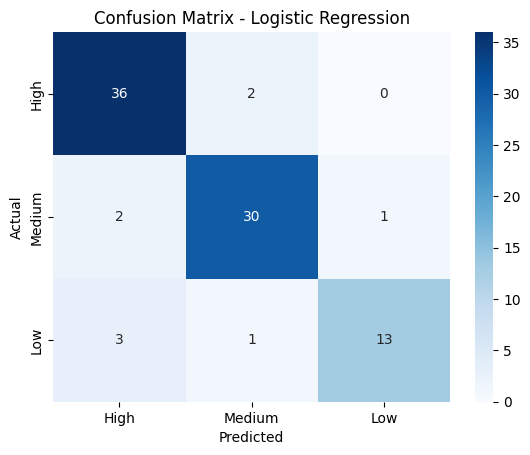

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=["High", "Medium", "Low"])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["High", "Medium", "Low"], yticklabels=["High", "Medium", "Low"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# مثال: مصفوفة الالتباس لـ Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)
plot_cm(y_test, y_pred, "Confusion Matrix - Logistic Regression")

In [50]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. تحويل الفئات إلى أرقام
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# 2. تعريف النماذج
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
lgbm = LGBMClassifier()

models = {
    "XGBoost": xgb,
    "LightGBM": lgbm
}

results = []

for name, model in models.items():
    model.fit(X_train_tfidf, y_train_enc)
    y_pred_enc = model.predict(X_test_tfidf)

    # 3. إعادة التوقعات إلى فئات نصية
    y_pred = le.inverse_transform(y_pred_enc)
    y_test_text = le.inverse_transform(y_test_enc)

    acc = accuracy_score(y_test_text, y_pred)
    report = classification_report(y_test_text, y_pred, output_dict=True)

    results.append({
        "Model": name,
        "Accuracy": round(acc * 100, 2),
        "Precision (High)": round(report["High"]["precision"], 2),
        "Recall (High)": round(report["High"]["recall"], 2),
        "F1-score (High)": round(report["High"]["f1-score"], 2)
    })

    print(f"\n=== {name} ===")
    print(classification_report(y_test_text, y_pred))
    print("الدقة:", accuracy_score(y_test, y_pred))


=== XGBoost ===
              precision    recall  f1-score   support

        High       1.00      0.95      0.97        38
         Low       0.94      1.00      0.97        17
      Medium       0.94      0.97      0.96        33

    accuracy                           0.97        88
   macro avg       0.96      0.97      0.97        88
weighted avg       0.97      0.97      0.97        88

الدقة: 0.9659090909090909
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 352, number of used features: 35
[LightGBM] [Info] Start training from score -0.852996
[LightGBM] [Info] Start training from score -1.658939
[LightGBM] [Info] Start training from score -0.958356
[LightGBM] [Warning] No further splits with positive gain, best 

In [51]:
print(le.classes_)  # ['High' 'Low' 'Medium']

['High' 'Low' 'Medium']


In [52]:
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision (High),Recall (High),F1-score (High)
0,XGBoost,96.59,1.0,0.95,0.97
1,LightGBM,96.59,1.0,0.95,0.97


In [58]:
def preprocess_and_predict(text, model):
    # نفس خطوات المعالجة السابقة
    cleaned = preprocess_text(text)
    cleaned = ' '.join([word for word in cleaned.split() if word not in stopwords.words('arabic')])
    cleaned = ' '.join([ISRIStemmer().stem(word) for word in cleaned.split()])

    vec = tfidf.transform([cleaned])
    pred = model.predict(vec)
    return pred[0]

# مثال:
new_description = "رواية تتحدث عن فتاة تبحث عن ذاتها في عالم مضطرب مليء بالصراعات بين القلب والعقل"
prediction = preprocess_and_predict(new_description, lgbm)

print("🔮 التصنيف المتوقع للوصف الجديد:", prediction)

🔮 التصنيف المتوقع للوصف الجديد: 2


In [61]:
results = []

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Model": name,
        "Accuracy": round(acc * 100, 2),
        "Precision (High)": round(report["High"]["precision"], 2),
        "Recall (High)": round(report["High"]["recall"], 2),
        "F1-score (High)": round(report["High"]["f1-score"], 2)
    })

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    print("الدقة:", round(acc * 100, 2))


=== Logistic Regression ===
              precision    recall  f1-score   support

        High       0.88      0.95      0.91        38
         Low       0.93      0.76      0.84        17
      Medium       0.91      0.91      0.91        33

    accuracy                           0.90        88
   macro avg       0.91      0.87      0.89        88
weighted avg       0.90      0.90      0.90        88

الدقة: 89.77

=== Naive Bayes ===
              precision    recall  f1-score   support

        High       0.72      0.95      0.82        38
         Low       0.80      0.24      0.36        17
      Medium       0.82      0.82      0.82        33

    accuracy                           0.76        88
   macro avg       0.78      0.67      0.67        88
weighted avg       0.77      0.76      0.73        88

الدقة: 76.14

=== Random Forest ===
              precision    recall  f1-score   support

        High       0.95      1.00      0.97        38
         Low       0.94      1

In [62]:
results_df = pd.DataFrame(results)
results_df.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy,Precision (High),Recall (High),F1-score (High)
2,Random Forest,96.59,0.95,1.00,0.97
0,Logistic Regression,89.77,0.88,0.95,0.91
1,Naive Bayes,76.14,0.72,0.95,0.82


In [63]:
best_model_name = results_df.sort_values(by="Accuracy", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]

print("✅ أفضل نموذج هو:", best_model_name)

✅ أفضل نموذج هو: Random Forest


In [64]:
def preprocess_and_predict(text, model):
    # المعالجة المسبقة كما في السابق
    cleaned = preprocess_text(text)
    cleaned = ' '.join([word for word in cleaned.split() if word not in stopwords.words('arabic')])
    cleaned = ' '.join([ISRIStemmer().stem(word) for word in cleaned.split()])

    vec = tfidf.transform([cleaned])
    pred = model.predict(vec)
    return pred[0]

# مثال:
new_text = "قصة فتاة تبحث عن ذاتها في عالم مليء بالتحديات النفسية والاجتماعية"
prediction = preprocess_and_predict(new_text, best_model)
print("🔮 التصنيف المتوقع:", prediction)

🔮 التصنيف المتوقع: High


In [ ]:
# تصنيف الكتب حسب المؤلف
# تصنيف الكتب حسب التقييم (عالي / متوسط / منخفض)
# تصنيف الكتب حسب نوع القصة (رومانسي، تاريخي، فلسفي، )

In [79]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


# ترميز الفئات
label_encoder = LabelEncoder()
data_cleaned['label'] = label_encoder.fit_transform(data_cleaned['Rating_Class'])  # High, Medium, Low → أرقام

# المعالجة المسبقة
texts = data_cleaned['Clean_Description'].astype(str).tolist()
labels = data_cleaned['label'].values
# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, stratify=labels, random_state=42)

In [80]:
max_words = 5000   # عدد الكلمات المميزة
max_len = 100      # أقصى طول للجملة

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [91]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))  # ثلاث فئات: High, Medium, Low

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [82]:
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - accuracy: 0.3788 - loss: 1.0947 - val_accuracy: 0.5278 - val_loss: 1.0560
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.5558 - loss: 1.0422 - val_accuracy: 0.7222 - val_loss: 0.9496
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.7803 - loss: 0.9090 - val_accuracy: 0.8056 - val_loss: 0.6604
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - accuracy: 0.8556 - loss: 0.5211 - val_accuracy: 0.8889 - val_loss: 0.3177
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.9912 - loss: 0.2071 - val_accuracy: 0.9444 - val_loss: 0.3384
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.9939 - loss: 0.0756 - val_accuracy: 0.9444 - val_loss: 0.8325
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.9838 - loss: 0.1181 - val_accuracy: 0.9167 - val_loss: 0.3849
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.9845 - loss: 0.0830 - val_accuracy: 0.

In [87]:
from sklearn.metrics import classification_report
import numpy as np

# التنبؤ
y_pred_prob = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)

# تأكد أن label_encoder تم تدريبه على النصوص:
label_encoder.fit(["High", "Medium", "Low"])

# طباعة التقرير باستخدام أسماء الفئات النصية
target_names = ["High", "Medium", "Low"]
print(classification_report(y_test, y_pred, target_names=target_names))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
              precision    recall  f1-score   support

        High       1.00      0.82      0.90        38
      Medium       0.65      1.00      0.79        17
         Low       0.90      0.85      0.88        33

    accuracy                           0.86        88
   macro avg       0.85      0.89      0.85        88
weighted avg       0.90      0.86      0.87        88



In [84]:
def predict_new_text_lstm(text):
    cleaned = preprocess_text(text)
    cleaned = ' '.join([word for word in cleaned.split() if word not in stopwords.words('arabic')])
    cleaned = ' '.join([ISRIStemmer().stem(word) for word in cleaned.split()])

    seq = tokenizer.texts_to_sequences([cleaned])
    pad = pad_sequences(seq, maxlen=max_len)
    pred = np.argmax(model.predict(pad), axis=1)[0]
    return label_encoder.inverse_transform([pred])[0]

# مثال:
text = "رواية رومانسية تتناول معاناة امرأة في مجتمعات محافظة تبحث عن حريتها"
print("🔮 التصنيف المتوقع:", predict_new_text_lstm(text))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
🔮 التصنيف المتوقع: 1


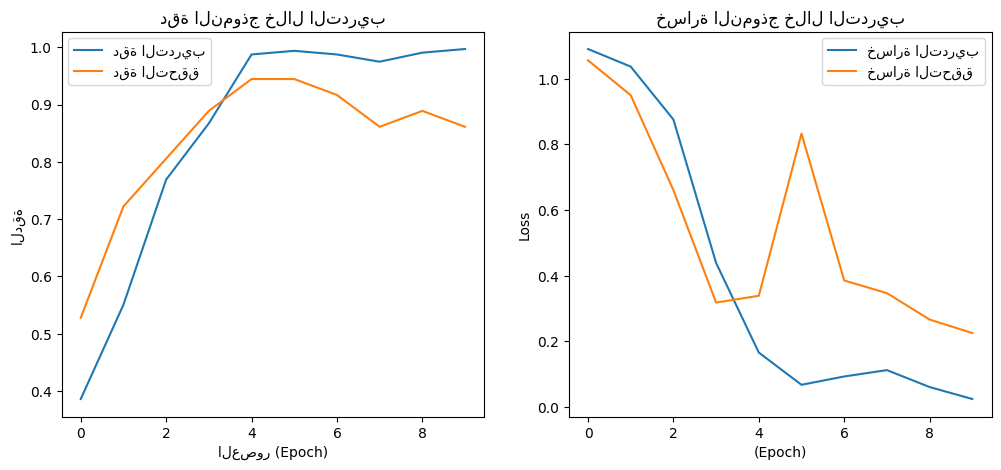

In [89]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # دقة التدريب والتحقق
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='دقة التدريب')
    plt.plot(history.history['val_accuracy'], label='دقة التحقق')
    plt.title('دقة النموذج خلال التدريب')
    plt.xlabel('العصور (Epoch)')
    plt.ylabel('الدقة')
    plt.legend()

    # خسارة التدريب والتحقق
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='خسارة التدريب')
    plt.plot(history.history['val_loss'], label='خسارة التحقق')
    plt.title('خسارة النموذج خلال التدريب')
    plt.xlabel('(Epoch)')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# استدعِ الدالة بعد تدريب النموذج
plot_training_history(history)

In [93]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

model1 = Sequential()
model1.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model1.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(3, activation='softmax'))  # ثلاث فئات: High, Medium, Low

model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [94]:
history1 = model1.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - accuracy: 0.4193 - loss: 1.0911 - val_accuracy: 0.3611 - val_loss: 1.0620
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.4481 - loss: 1.0407 - val_accuracy: 0.3611 - val_loss: 0.9798
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.4986 - loss: 0.9140 - val_accuracy: 0.6111 - val_loss: 0.7911
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.7585 - loss: 0.6509 - val_accuracy: 0.9167 - val_loss: 0.5967
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.9582 - loss: 0.4181 - val_accuracy: 0.9167 - val_loss: 0.2997
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.9406 - loss: 0.2232 - val_accuracy: 0.9167 - val_loss: 0.2226
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.9946 - loss: 0.1064 - val_accuracy: 0.9444 - val_loss: 0.1379
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9786 - loss: 0.0699 - val_accuracy: 0.9167 - 

In [95]:
from sklearn.metrics import classification_report
import numpy as np

# التنبؤ
y_pred_prob = model1.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)

# تأكد أن label_encoder تم تدريبه على النصوص:
label_encoder.fit(["High", "Medium", "Low"])

# طباعة التقرير باستخدام أسماء الفئات النصية
target_names = ["High", "Medium", "Low"]
print(classification_report(y_test, y_pred, target_names=target_names))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step
              precision    recall  f1-score   support

        High       0.94      0.87      0.90        38
      Medium       0.77      1.00      0.87        17
         Low       0.90      0.85      0.88        33

    accuracy                           0.89        88
   macro avg       0.87      0.91      0.88        88
weighted avg       0.90      0.89      0.89        88



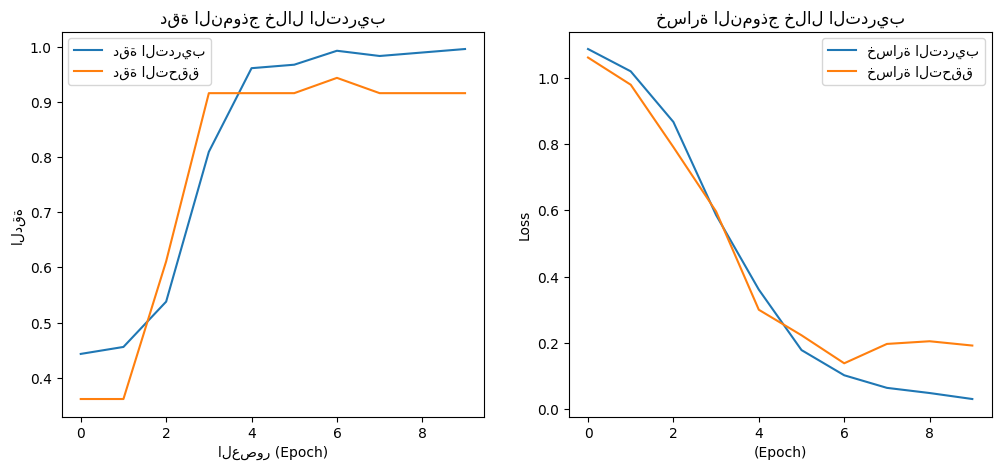

In [96]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # دقة التدريب والتحقق
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history1.history['accuracy'], label='دقة التدريب')
    plt.plot(history1.history['val_accuracy'], label='دقة التحقق')
    plt.title('دقة النموذج خلال التدريب')
    plt.xlabel('العصور (Epoch)')
    plt.ylabel('الدقة')
    plt.legend()

    # خسارة التدريب والتحقق
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['loss'], label='خسارة التدريب')
    plt.plot(history1.history['val_loss'], label='خسارة التحقق')
    plt.title('خسارة النموذج خلال التدريب')
    plt.xlabel('(Epoch)')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# استدعِ الدالة بعد تدريب النموذج
plot_training_history(history)

In [97]:
def predict_new_text_lstm(text):
    cleaned = preprocess_text(text)
    cleaned = ' '.join([word for word in cleaned.split() if word not in stopwords.words('arabic')])
    cleaned = ' '.join([ISRIStemmer().stem(word) for word in cleaned.split()])

    seq = tokenizer.texts_to_sequences([cleaned])
    pad = pad_sequences(seq, maxlen=max_len)
    pred = np.argmax(model1.predict(pad), axis=1)[0]
    return label_encoder.inverse_transform([pred])[0]

# مثال:
text = "رواية رومانسية تتناول معاناة امرأة في مجتمعات محافظة تبحث عن حريتها"
print("🔮 التصنيف المتوقع:", predict_new_text_lstm(text))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
🔮 التصنيف المتوقع: Low
